In [330]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/useful_py_functions/matplotlib_custom_style_and_macros.py
else:
    %run /Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py

In [362]:
df_modPar = pd.read_csv('/Users/andreas/phys/master/GRB/xspec/ModelPar_Analysis/modelPar.csv', header=0, index_col=0, sep='&')
#df_modPar = pd.read_csv('/Home/siv30/wad005/master/GRB/xspec/ModelPar_Analysis/modelPar.csv',header=0, index_col=0, sep='&')
df_modPar.columns = df_modPar.columns.str.strip()
df_modPar = df_modPar.drop(columns = ['chi2/dof','C_A','C_F'])


# Define a function to extract the three values from each parameter cell
def extract_values(cell):
    # Convert the cell to a string
    cell = str(cell)
    # Remove any special characters
    cell = re.sub(r'[\$\^_{}\\*]', '', cell)
    # Extract the three values
    values = re.findall(r'[-+]?[0-9]*\.?[0-9]+', cell)
    if len(values) == 3:
        value,upper,lower = map(float, values)
    else:
        lower = value = upper = float('nan')
    return lower, value, upper


param_cols = ['alpha','beta','Epeak']
# Loop over the parameter columns
for col in param_cols:
    # Create new columns for lower, value, and upper
    df_modPar[col+'_lower'] = np.nan
    df_modPar[col+'_value'] = np.nan
    df_modPar[col+'_upper'] = np.nan
    # Apply the extract_values function to each cell in the column
    for idx, cell in df_modPar[col].items():
        lower, value, upper = extract_values(cell)
        df_modPar.at[idx, col+'_lower'] = lower
        df_modPar.at[idx, col+'_value'] = value
        df_modPar.at[idx, col+'_upper'] = upper
    # Remove the original parameter column
    df_modPar.drop(col, axis=1, inplace=True)
df_modPar = df_modPar.rename(columns = {'alpha_value':'alpha','beta_value':'beta','Epeak_value':'Epeak'})  

# Get all the labels from df_modPar
labels = df_modPar.index.values

# Strip all the strings in the labels object
labels = list(map(str.strip, labels))

# Update the dataframe with the stripped labels
df_modPar.index = list(labels)
#manually updating the name
df_modPar.index.values[7] = '201227A'

idx = df_modPar.index.get_loc('210619B')

# Update the values for the specific row using iloc
df_modPar.iloc[idx.start, :] = [1, -0.116, -0.510, 0.114, -0.055, -2.165, 0.053, -57,581, 63]
df_modPar.drop(index='211211A',inplace=True)
df_modPar['GRB'] = df_modPar.index.values

df_modPar['Model'] = ['Band']*10
df_modPar = df_modPar[['GRB', 'Int', 'Model', 'alpha_lower', 'alpha', 'alpha_upper', 'beta_lower', 'beta', 'beta_upper', 'Epeak_lower', 'Epeak', 'Epeak_upper']]
# Drop rows with 'GRB' values '200521A_1' or '201227A_1'
df_modPar = df_modPar.drop(df_modPar[df_modPar['GRB'].isin(['200521A', '201227A'])].index)
df_modPar.reset_index(drop=True,inplace=True)
# Loop through each row in df_modPar
for i, row in df_modPar.iterrows():
    # Get the value of the 'Int' column for the current row
    num = row['Int']
    # Add "_{i}" to the end of the 'GRB' string for the current row
    df_modPar.at[i, 'GRB'] = f"{row['GRB']}_{num}"
df_modPar

,GRB,Int,Model,alpha_lower,alpha,alpha_upper,beta_lower,beta,beta_upper,Epeak_lower,Epeak,Epeak_upper
0,181222B_1,1,Band,-0.028,-0.538,0.025,-0.143,-3.077,0.094,-9.0,365.0,10.0
1,181222B_2,2,Band,-0.043,-0.118,0.045,-0.359,-4.145,0.292,-11.0,430.0,11.0
2,190206A_1,1,Band,-0.085,-0.318,0.088,-0.544,-3.392,0.299,-102.0,1083.0,138.0
3,190305A_1,1,Band,-0.063,-0.179,0.073,-0.143,-3.015,0.126,-22.0,435.0,20.0
4,190606A_1,1,Band,-0.047,-1.020,0.047,-0.241,-2.120,0.154,-694.0,1672.0,905.0
5,200716C_1,1,Band,-0.089,-0.537,0.099,-0.729,-2.830,0.300,-90.0,702.0,107.0
6,210619B_1,1,Band,-0.116,-0.510,0.114,-0.055,-2.165,0.053,-57.0,581.0,63.0
7,210619B_2,2,Band,-0.038,-0.733,0.047,-0.027,-2.217,0.028,-28.0,543.0,24.0


In [363]:
#validated that all entries are correct
df_modPar_KW = pd.DataFrame({
    'GRB': ['181222B', '||', '190206A', '||', '190305A', '190606A', '200521A', '200716C', '201227A', '210619B', '||'],
    'Int': [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    'Model': ['Band', 'Band', 'Band', 'CPL', 'Band', 'Band', 'CPL', 'Band', 'CPL', 'Band', 'Band'],
    'alpha': [-0.520, -0.110, -0.501, 0.567, -0.162, -0.676, 0.259, -0.544, 0.190, -0.427, -0.500],
    'alpha_upper': [0.085, 0.126, 0.101, 0.091, 0.072, 0.493, 0.131, 0.208, 0.370, 0.122, 0.061],
    'alpha_lower': [-0.076, -0.112, -0.100, -0.092, -0.067, -0.296, -0.141, -0.163, -0.003, -0.109, -0.057],
    'beta': [-2.98, -3.53, -2.95, np.nan, -2.96, -1.69, np.nan, -2.31, np.nan, -2.06, -2.01],
    'beta_upper': [0.216, 0.410, 0.472, 1.0, 0.127, 0.145, 1.0, 0.284, 1.0, 0.090, 0.036],
    'beta_lower': [-0.314, -0.836, -2.950, -1.0, -0.158, -0.209, -1.0, -0.620, -1.0, -0.114, -0.039],
    'Epeak': [368, 417, 1402, 1593, 425, 478, 1333, 667, 882, 587, 433],
    'Epeak_upper': [28, 31, 366, 252, 21, 379, 195, 180, 138, 94, 30],
    'Epeak_lower': [-29, -32, -324, -595, -21, -226, -166, -153, -114, -78, -28]
})

df_modPar_KW.loc[df_modPar_KW['Model'] == 'CPL', ['beta', 'beta_upper', 'beta_lower']] = np.nan

# Create a boolean mask to identify rows where 'Model' equals 'CPL'
mask = df_modPar_KW['Model'] == 'CPL'

# Drop the rows identified by the mask and update the dataframe
df_modPar_KW.drop(df_modPar_KW[mask].index, inplace=True)

df_modPar_KW.reset_index(inplace=True,drop=True)
df_modPar_KW.loc[1, 'GRB'] = '181222B'
df_modPar_KW.loc[7, 'GRB'] = '210619B'


# Loop through each row in df_modPar_KW
for i, row in df_modPar_KW.iterrows():
    # Get the value of the 'Int' column for the current row
    num = row['Int']
    
    # Add "_{i}" to the end of the 'GRB' string for the current row
    df_modPar_KW.at[i, 'GRB'] = f"{row['GRB']}_{num}"

df_modPar_KW


,GRB,Int,Model,alpha,alpha_upper,alpha_lower,beta,beta_upper,beta_lower,Epeak,Epeak_upper,Epeak_lower
0,181222B_1,1,Band,-0.520,0.085,-0.076,-2.98,0.216,-0.314,368,28,-29
1,181222B_2,2,Band,-0.110,0.126,-0.112,-3.53,0.410,-0.836,417,31,-32
2,190206A_1,1,Band,-0.501,0.101,-0.100,-2.95,0.472,-2.950,1402,366,-324
3,190305A_1,1,Band,-0.162,0.072,-0.067,-2.96,0.127,-0.158,425,21,-21
4,190606A_1,1,Band,-0.676,0.493,-0.296,-1.69,0.145,-0.209,478,379,-226
5,200716C_1,1,Band,-0.544,0.208,-0.163,-2.31,0.284,-0.620,667,180,-153
6,210619B_1,1,Band,-0.427,0.122,-0.109,-2.06,0.090,-0.114,587,94,-78
7,210619B_2,2,Band,-0.500,0.061,-0.057,-2.01,0.036,-0.039,433,30,-28


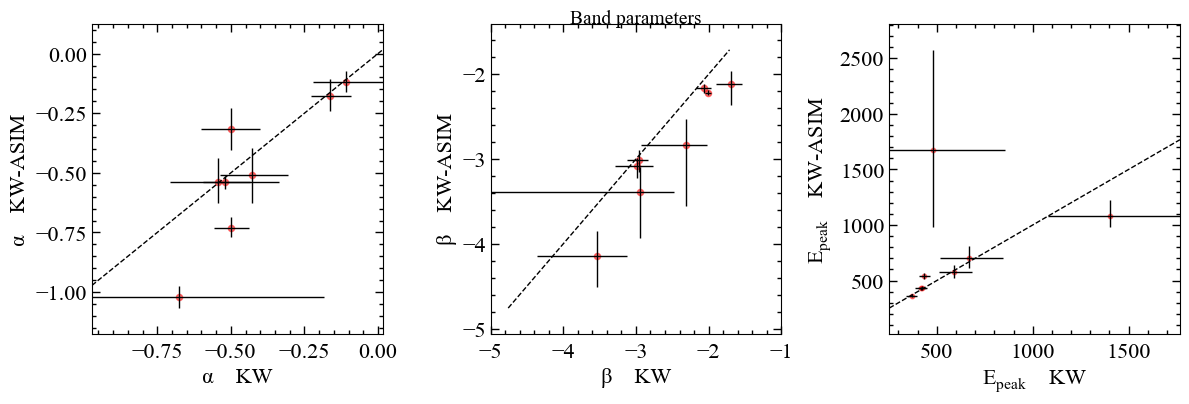

In [391]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Define the x-values for each subplot (use df_modPar_KW)
x_alpha = df_modPar_KW['alpha']
x_beta = df_modPar_KW['beta']
x_Epeak = df_modPar_KW['Epeak']

# Define the y-values for each subplot (use df_modPar)
y_alpha = df_modPar['alpha']
y_beta = df_modPar['beta']
y_Epeak = df_modPar['Epeak']

# Define the vertical error bars for each subplot (use df_modPar)
xerr_alpha = [df_modPar_KW['alpha_lower'].values, df_modPar_KW['alpha_upper'].values]
xerr_beta = [df_modPar_KW['beta_lower'].values, df_modPar_KW['beta_upper'].values]
xerr_Epeak = [df_modPar_KW['Epeak_lower'].values, df_modPar_KW['Epeak_upper'].values]

# Define the horizontal error bars for each subplot (use df_modPar_KW)
yerr_alpha = [df_modPar['alpha_lower'].values,df_modPar['alpha_upper'].values]
yerr_beta =  [df_modPar['beta_lower'].values,df_modPar['beta_upper'].values]
yerr_Epeak = [df_modPar['Epeak_lower'].values,df_modPar['Epeak_upper'].values]


# Create the scatter plots with error bars for each subplot
axs[0].scatter(x_alpha, y_alpha, color='red',marker='o',s=20,alpha=0.5)
axs[0].vlines(x_alpha, y_alpha+yerr_alpha[0], y_alpha+yerr_alpha[1])
axs[0].hlines(y_alpha, x_alpha+xerr_alpha[0], x_alpha+xerr_alpha[1])

axs[1].scatter(x_beta, y_beta, color='red',marker='o',s=20,alpha=0.5)
axs[1].vlines(x_beta, y_beta+yerr_beta[0], y_beta+yerr_beta[1])
axs[1].hlines(y_beta, x_beta+xerr_beta[0], x_beta+xerr_beta[1])

axs[2].scatter(x_Epeak, y_Epeak,color='red',marker='o',s=10,alpha=0.5)
axs[2].vlines(x_Epeak, y_Epeak+yerr_Epeak[0], y_Epeak+yerr_Epeak[1])
axs[2].hlines(y_Epeak, x_Epeak+xerr_Epeak[0], x_Epeak+xerr_Epeak[1])

# Add titles and labels to each subplot

axs[0].set_xlabel('\u03B1    KW')
axs[0].set_ylabel('\u03B1    KW-ASIM')


axs[1].set_xlabel('\u03B2    KW')
axs[1].set_xlim(left=-5,right=-1)
axs[1].set_ylabel('\u03B2    KW-ASIM')


axs[2].set_xlabel('$E_{peak}$    KW')
axs[2].set_ylabel('$E_{peak}$    KW-ASIM')

# Plot a linear line in each subplot with limits defined by the axes
for ax in axs:
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    low = max(xlim[0], ylim[0])
    high = min(xlim[1], ylim[1])
    x = np.linspace(low, high, 1000)
    y = x
    ax.plot(x, y, ls='--', color='k')
    
fig.suptitle('Band parameters',fontsize=14,ha='center',y=0.999,x=0.534)
fig.tight_layout()
fig.savefig('Band_parameters_KW_ASIM.pdf',format='pdf',dpi=350)
plt.show()

In [392]:
df_modPar

,GRB,Int,Model,alpha_lower,alpha,alpha_upper,beta_lower,beta,beta_upper,Epeak_lower,Epeak,Epeak_upper
0,181222B_1,1,Band,-0.028,-0.538,0.025,-0.143,-3.077,0.094,-9.0,365.0,10.0
1,181222B_2,2,Band,-0.043,-0.118,0.045,-0.359,-4.145,0.292,-11.0,430.0,11.0
2,190206A_1,1,Band,-0.085,-0.318,0.088,-0.544,-3.392,0.299,-102.0,1083.0,138.0
3,190305A_1,1,Band,-0.063,-0.179,0.073,-0.143,-3.015,0.126,-22.0,435.0,20.0
4,190606A_1,1,Band,-0.047,-1.020,0.047,-0.241,-2.120,0.154,-694.0,1672.0,905.0
5,200716C_1,1,Band,-0.089,-0.537,0.099,-0.729,-2.830,0.300,-90.0,702.0,107.0
6,210619B_1,1,Band,-0.116,-0.510,0.114,-0.055,-2.165,0.053,-57.0,581.0,63.0
7,210619B_2,2,Band,-0.038,-0.733,0.047,-0.027,-2.217,0.028,-28.0,543.0,24.0


In [393]:
df_modPar_KW

,GRB,Int,Model,alpha,alpha_upper,alpha_lower,beta,beta_upper,beta_lower,Epeak,Epeak_upper,Epeak_lower
0,181222B_1,1,Band,-0.520,0.085,-0.076,-2.98,0.216,-0.314,368,28,-29
1,181222B_2,2,Band,-0.110,0.126,-0.112,-3.53,0.410,-0.836,417,31,-32
2,190206A_1,1,Band,-0.501,0.101,-0.100,-2.95,0.472,-2.950,1402,366,-324
3,190305A_1,1,Band,-0.162,0.072,-0.067,-2.96,0.127,-0.158,425,21,-21
4,190606A_1,1,Band,-0.676,0.493,-0.296,-1.69,0.145,-0.209,478,379,-226
5,200716C_1,1,Band,-0.544,0.208,-0.163,-2.31,0.284,-0.620,667,180,-153
6,210619B_1,1,Band,-0.427,0.122,-0.109,-2.06,0.090,-0.114,587,94,-78
7,210619B_2,2,Band,-0.500,0.061,-0.057,-2.01,0.036,-0.039,433,30,-28


# GOODNESS OF FIT

In [343]:
df_modPar = pd.read_csv('/Users/andreas/phys/master/GRB/xspec/ModelPar_Analysis/modelPar.csv', header=0, index_col=0, sep='&')
#df_modPar = pd.read_csv('/Home/siv30/wad005/master/GRB/xspec/ModelPar_Analysis/modelPar.csv',header=0, index_col=0, sep='&')
df_modPar.columns = df_modPar.columns.str.strip()
#df_modPar = df_modPar.drop(columns = ['chi2/dof','C_A','C_F'])


# Define a function to extract the three values from each parameter cell
def extract_values(cell):
    # Convert the cell to a string
    cell = str(cell)
    # Remove any special characters
    cell = re.sub(r'[\$\^_{}\\*]', '', cell)
    # Extract the three values
    values = re.findall(r'[-+]?[0-9]*\.?[0-9]+', cell)
    if len(values) == 3:
        value,upper,lower = map(float, values)
    else:
        lower = value = upper = float('nan')
    return lower, value, upper


param_cols = ['alpha','beta','Epeak','C_A','C_F']
# Loop over the parameter columns
for col in param_cols:
    # Create new columns for lower, value, and upper
    df_modPar[col+'_lower'] = np.nan
    df_modPar[col+'_value'] = np.nan
    df_modPar[col+'_upper'] = np.nan
    # Apply the extract_values function to each cell in the column
    for idx, cell in df_modPar[col].items():
        lower, value, upper = extract_values(cell)
        df_modPar.at[idx, col+'_lower'] = lower
        df_modPar.at[idx, col+'_value'] = value
        df_modPar.at[idx, col+'_upper'] = upper
    # Remove the original parameter column
    df_modPar.drop(col, axis=1, inplace=True)
    
df_modPar['GRB'] = df_modPar.index.values
df_modPar.reset_index(drop=True,inplace=True)

df_modPar = df_modPar.rename(columns = {'alpha_value':'alpha','beta_value':'beta','Epeak_value':'Epeak','C_A_value':'C_A','C_F_value':'C_F'}) 
for i, row in df_modPar.iterrows():
    # Get the value of the 'Int' column for the current row
    num = row['Int']
    # Add "_{i}" to the end of the 'GRB' string for the current row
    df_modPar.at[i, 'GRB'] = f"{row['GRB']}_{num}"
    
df_modPar = df_modPar[['GRB','Int','alpha_lower', 'alpha', 'alpha_upper', 'beta_lower', 'beta', 'beta_upper', 'Epeak_lower', 'Epeak', 'Epeak_upper','C_A_upper','C_A','C_A_lower','C_F_upper'
                      ,'C_F','C_F_lower','chi2/dof']]

# Update the values for the specific row using iloc
df_modPar.iloc[8] = ['210619B_1',1, -0.116, -0.510, 0.114, -0.055, -2.165, 0.053, -57,581, 63, 0.07, 0.922,-0.057,0.048,1.18,-0.046,'248/206 (1.12)']
df_modPar

,GRB,Int,alpha_lower,alpha,alpha_upper,beta_lower,beta,beta_upper,Epeak_lower,Epeak,Epeak_upper,C_A_upper,C_A,C_A_lower,C_F_upper,C_F,C_F_lower,chi2/dof
0,181222B_1,1,-0.028,-0.538,0.025,-0.143,-3.077,0.094,-9.0,365.0,10.0,0.055,0.850,-0.062,0.030,1.130,-0.032,265/204 (1.30)
1,181222B _2,2,-0.043,-0.118,0.045,-0.359,-4.145,0.292,-11.0,430.0,11.0,0.050,0.854,-0.047,0.045,1.120,-0.042,198/181 (1.06)
2,190206A _1,1,-0.085,-0.318,0.088,-0.544,-3.392,0.299,-102.0,1083.0,138.0,0.229,2.710,-0.230,NaN,NaN,NaN,56/42 (1.32)
3,190305A _1,1,-0.063,-0.179,0.073,-0.143,-3.015,0.126,-22.0,435.0,20.0,0.027,0.349,-0.025,NaN,NaN,NaN,89/68 (1.29)
4,190606A _1,1,-0.047,-1.020,0.047,-0.241,-2.120,0.154,-694.0,1672.0,905.0,0.176,1.270,-0.165,0.094,1.010,-0.085,92/79 (1.16)
5,200521A _1,1,-0.083,-0.392,0.087,-0.079,-2.200,0.089,-268.0,1411.0,156.0,0.109,1.370,-0.098,NaN,NaN,NaN,47/45 (1.05)
6,200716C _1,1,-0.089,-0.537,0.099,-0.729,-2.830,0.300,-90.0,702.0,107.0,0.172,1.110,-0.144,0.079,0.985,-0.073,129/141 (0.91)
7,201227A$^{*}$ _1,1,-0.067,-0.199,0.083,-0.896,-3.570,0.508,-68.0,948.0,52.0,0.125,1.220,-0.115,0.084,1.360,-0.078,72/68 (1.05)
8,210619B_1,1,-0.116,-0.510,0.114,-0.055,-2.165,0.053,-57.0,581.0,63.0,0.070,0.922,-0.057,0.048,1.180,-0.046,248/206 (1.12)
9,210619B _2,2,-0.038,-0.733,0.047,-0.027,-2.217,0.028,-28.0,543.0,24.0,0.033,0.848,-0.027,0.030,1.130,-0.030,325/222 (1.46)


In [344]:
# Split df_modPar into two dataframes based on NaN values
df_no_nan = df_modPar[df_modPar.isna().sum(axis=1) == 0]
df_with_nan = df_modPar[df_modPar.isna().sum(axis=1) > 0]

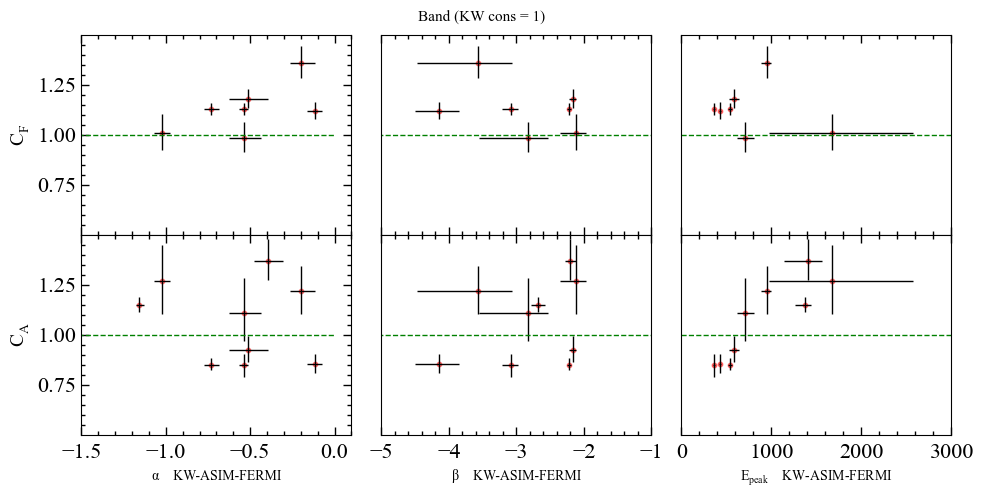

In [361]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_axes([0.1, 0.5, 0.27, 0.4], xticklabels=[], ylim=(0.5, 1.5))
ax2 = fig.add_axes([0.4, 0.5, 0.27, 0.4], xticklabels=[], ylim=(0.5, 1.5))
ax3 = fig.add_axes([0.7, 0.5, 0.27, 0.4], xticklabels=[], ylim=(0.5, 1.5))

ax4 = fig.add_axes([0.1, 0.1, 0.27, 0.4], ylim=(0.5, 1.5))
ax5 = fig.add_axes([0.4, 0.1, 0.27, 0.4], ylim=(0.5, 1.5))
ax6 = fig.add_axes([0.7, 0.1, 0.27, 0.4], ylim=(0.5, 1.5))

# set the yticks for each subplot
ax1.set_yticks([0.75, 1, 1.25])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([0.75, 1, 1.25])
ax5.set_yticks([])
ax6.set_yticks([])



#-------------------Only KW-ASIM-FERMI
alpha = df_no_nan['alpha'].values
beta = df_no_nan['beta'].values
Epeak = df_no_nan['Epeak'].values
C_A = df_no_nan['C_A'].values
C_F = df_no_nan['C_F'].values

alpha_err = [df_no_nan['alpha_lower'].values, df_no_nan['alpha_upper'].values]
beta_err = [df_no_nan['beta_lower'].values, df_no_nan['beta_upper'].values]
Epeak_err = [df_no_nan['Epeak_lower'].values, df_no_nan['Epeak_upper'].values]
C_A_err = [df_no_nan['C_A_lower'].values, df_no_nan['C_A_upper'].values]
C_F_err = [df_no_nan['C_F_lower'].values, df_no_nan['C_F_upper'].values]
#-------------------Only KW-ASIM-FERMI



#-------------------Only KW-ASIM
alphaA = df_with_nan['alpha'].values
betaA = df_with_nan['beta'].values
EpeakA = df_with_nan['Epeak'].values
C_AA = df_with_nan['C_A'].values

alpha_errA = [df_with_nan['alpha_lower'].values, df_with_nan['alpha_upper'].values]
beta_errA = [df_with_nan['beta_lower'].values, df_with_nan['beta_upper'].values]
Epeak_errA = [df_with_nan['Epeak_lower'].values, df_with_nan['Epeak_upper'].values]
C_A_errA = [df_with_nan['C_A_lower'].values, df_with_nan['C_A_upper'].values]
#-------------------Only KW-ASIM


# ax1
ax1.scatter(alpha,C_F,s=10,marker='o',alpha=0.5,color='r')
ax1.vlines(alpha,C_F+C_F_err[0],C_F+C_F_err[1])
ax1.hlines(C_F,alpha+alpha_err[0],alpha+alpha_err[1])

# ax2
ax2.scatter(beta,C_F,s=10,marker='o',alpha=0.5,color='r')
ax2.vlines(beta,C_F+C_F_err[0],C_F+C_F_err[1])
ax2.hlines(C_F,beta+beta_err[0],beta+beta_err[1])

# ax3
ax3.scatter(Epeak,C_F,s=10,marker='o',alpha=0.5,color='r')
ax3.vlines(Epeak,C_F + C_F_err[0],C_F + C_F_err[1])
ax3.hlines(C_F,Epeak+Epeak_err[0],Epeak + Epeak_err[1])

#ax4
ax4.scatter(alpha,C_A,s=10,marker='o',alpha=0.5,color='r')
ax4.vlines(alpha,C_A+C_A_err[0],C_A+C_A_err[1])
ax4.hlines(C_A,alpha+alpha_err[0],alpha+alpha_err[1])

#ax4 with only ASIM
ax4.scatter(alphaA,C_AA,s=10,marker='o',alpha=0.5,color='r')
ax4.vlines(alphaA,C_AA+C_A_errA[0],C_AA+C_A_errA[1])
ax4.hlines(C_AA,alphaA+alpha_errA[0],alphaA+alpha_errA[1])

# ax5
ax5.scatter(beta,C_A,s=10,marker='o',alpha=0.5,color='r')
ax5.vlines(beta,C_A+C_A_err[0],C_A+C_A_err[1])
ax5.hlines(C_A,beta+beta_err[0],beta+beta_err[1])

#ax5 with only ASIM
ax5.scatter(betaA,C_AA,s=10,marker='o',alpha=0.5,color='r')
ax5.vlines(betaA,C_AA+C_A_errA[0],C_AA+C_A_errA[1])
ax5.hlines(C_AA,betaA+beta_errA[0],betaA+beta_errA[1])

# ax6
ax6.scatter(Epeak,C_A,s=10,marker='o',alpha=0.5,color='r')
ax6.vlines(Epeak,C_A+C_A_err[0],C_A+C_A_err[1])
ax6.hlines(C_A,Epeak+Epeak_err[0],Epeak+Epeak_err[1])

#ax6 with only ASIM
ax6.scatter(EpeakA,C_AA,s=10,marker='o',alpha=0.5,color='r')
ax6.vlines(EpeakA,C_AA+C_A_errA[0],C_AA+C_A_errA[1])
ax6.hlines(C_AA,EpeakA+Epeak_errA[0],EpeakA+Epeak_errA[1])
#------------------------------------------------------------------------------------------------



ax1.set_ylabel('$C_F$',fontsize=14)
ax4.set_xlabel('\u03B1    KW-ASIM-FERMI',fontsize=10)
ax4.set_ylabel('$C_A$',fontsize=14)

ax5.set_xlabel('\u03B2    KW-ASIM-FERMI',fontsize=10)
ax6.set_xlabel('$E_{peak}$    KW-ASIM-FERMI',fontsize=10)

ax1.hlines(y=1,xmin=-2,xmax=0,linestyle='--',color='green')
ax2.hlines(y=1,xmin=-8,xmax=0.5,linestyle='--',color='green')
ax3.hlines(y=1,xmin=0,xmax=4e3,linestyle='--',color='green')
ax4.hlines(y=1,xmin=-2,xmax=0,linestyle='--',color='green')
ax5.hlines(y=1,xmin=-8,xmax=0.5,linestyle='--',color='green')
ax6.hlines(y=1,xmin=0,xmax=4e3,linestyle='--',color='green')

ax1.set_xlim(left=-1.5,right=0.1)
ax2.set_xlim(left=-5,right=-1)

ax4.set_xlim(ax1.get_xlim())
ax5.set_xlim(ax2.get_xlim())

ax3.set_xlim(left=0,right=3e3)
ax6.set_xlim(left=0,right=3e3)

fig.suptitle('Band (KW cons = 1)',y=0.95,fontsize=11,x=0.5)
fig.savefig('Band_calibCoefs_KW_ASIM_FERMI.pdf',format='pdf',dpi=350)
plt.show()

In [327]:
df_with_nan

,GRB,Int,alpha_lower,alpha,alpha_upper,beta_lower,beta,beta_upper,Epeak_lower,Epeak,Epeak_upper,C_A_upper,C_A,C_A_lower,C_F_upper,C_F,C_F_lower,chi2/dof
2,190206A _1,1,-0.085,-0.318,0.088,-0.544,-3.392,0.299,-102.0,1083.0,138.0,0.229,2.710,-0.230,NaN,NaN,NaN,56/42 (1.32)
3,190305A _1,1,-0.063,-0.179,0.073,-0.143,-3.015,0.126,-22.0,435.0,20.0,0.027,0.349,-0.025,NaN,NaN,NaN,89/68 (1.29)
5,200521A _1,1,-0.083,-0.392,0.087,-0.079,-2.200,0.089,-268.0,1411.0,156.0,0.109,1.370,-0.098,NaN,NaN,NaN,47/45 (1.05)
10,211211A _1,1,-0.018,-1.156,0.026,-0.098,-2.680,0.108,-105.0,1368.0,68.0,0.040,1.150,-0.038,NaN,NaN,NaN,194/152 (1.28)
